In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
results_path = "results.csv"
results = pd.read_csv(results_path)

In [3]:
results_uncalib_path = "results_uncalib.csv"
results_uncalib = pd.read_csv(results_uncalib_path)

In [5]:
display(results)

,exp_name,exp_min_sample_size,exp_share_budget,exp_naive,exp_budget,exp_run_num,tau_hat,max_est,cal_hours,cal_mean_generated_samples,cal_mean_c_value,cal_miscoverage,test_miscoverage,test_mean_lpb,test_mean_covered_lpb,test_miscoverage_lowerbound,test_miscoverage_upperbound
0,Global Budgeting,0.5,True,False,10,0,0.396825,20.0,0.063,9.308729,9.956858,0.099638,0.102083,15.629667,15.899397,NaN,NaN
1,Global Budgeting,0.5,True,False,25,0,0.266180,50.0,0.116,22.760811,24.911203,0.099884,0.097583,29.438833,29.970819,NaN,NaN
2,Global Budgeting,0.5,True,False,50,0,0.238989,100.0,0.209,45.257844,50.051589,0.099926,0.099667,44.720667,45.498889,NaN,NaN
3,Global Budgeting,0.5,True,False,100,0,0.222894,200.0,0.392,89.467518,99.820243,0.099406,0.099333,63.365167,64.426258,NaN,NaN
4,Global Budgeting,0.5,True,False,200,0,0.217314,400.0,0.601,139.350211,156.321098,0.099658,0.101833,85.518583,86.424290,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Fixed Budgeting,NaN,False,True,50,4,0.281806,inf,0.064,5.670404,6.867810,0.099699,NaN,223.905250,148.299180,0.134000,0.146833
66,Fixed Budgeting,NaN,False,True,100,4,0.254628,inf,0.126,13.157884,15.683880,0.099662,NaN,198.844000,134.488934,0.122417,0.134000
67,Fixed Budgeting,NaN,False,True,200,4,0.132548,inf,0.215,26.995977,32.103077,0.099914,NaN,96.492917,79.223167,0.065917,0.069083
68,Fixed Budgeting,NaN,False,True,300,4,0.224311,inf,0.303,39.825875,46.894912,0.099304,NaN,171.936750,121.771118,0.108000,0.117083


In [6]:
print(results.columns.to_list())

['exp_name', 'exp_min_sample_size', 'exp_share_budget', 'exp_naive', 'exp_budget', 'exp_run_num', 'tau_hat', 'max_est', 'cal_hours', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', 'test_mean_covered_lpb', 'test_miscoverage_lowerbound', 'test_miscoverage_upperbound']


In [7]:

import seaborn as sns

# in all plots, the legend is exp_name
# the x axis in all plots is exp_budget
# for each y value create a distinct plot:
# exp_budget vs the following: 'tau_hat', 'max_est', 'cal_mean_generated_samples', 'cal_mean_c_value', 'cal_miscoverage', 'test_miscoverage', 'test_mean_lpb', `cal_hours`

# use sns.lineplot to plot the results
def plot_results(x, y, title, xlabel, ylabel, hue=None, ax = None) -> plt.Axes:
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))
        
    if hue is None:
        hue = 'exp_name'
    
    # Create a line plot with confidence intervals
    ax = sns.lineplot(data=results, x=x, y=y, hue=hue, ax=ax, marker="o", errorbar="sd")
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    return ax
    
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()
        
# 1. exp_budget vs tau_hat
ax = plot_results('exp_budget', 'tau_hat', 'Estimated tau_hat vs Budget', 'Budget per Sample', 'Estimated tau_hat', ax=axes[0])
ax.axhline(y=0.1, color='r', linestyle='--', label='True tau')
ax.legend()

# 2. exp_budget vs max_est
plot_results('exp_budget', 'max_est', 'Max Estimation vs Budget', 'Budget per Sample', 'Max Estimation', ax=axes[1])

# 3. exp_budget vs cal_mean_generated_samples
ax = plot_results('exp_budget', 'cal_mean_generated_samples', 'Mean Generated Samples vs Budget', 'Budget per Sample', 'Mean Generated Samples', ax=axes[2])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 4. exp_budget vs cal_mean_c_value
ax = plot_results('exp_budget', 'cal_mean_c_value', 'Mean C Value vs Budget', 'Budget per Sample', 'Mean C Value', ax=axes[3])
ax.plot(results['exp_budget'].unique(), results['exp_budget'].unique(), color='red', linestyle='--', label='Ideal Budget Used')
ax.legend()

# 5. exp_budget vs cal_miscoverage
ax = plot_results('exp_budget', 'cal_miscoverage', 'Calibration Miscoverage vs Budget', 'Budget per Sample', 'Calibration Miscoverage', ax=axes[4])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.legend()

# 6. exp_budget vs test_miscoverage
ax = plot_results('exp_budget', 'test_miscoverage', 'Test Miscoverage vs Budget', 'Budget per Sample', 'Test Miscoverage', ax=axes[5])
ax.axhline(y=0.1, color='r', linestyle='--', label='Ideal Miscoverage')
ax.axhline(y=results_uncalib['test_miscoverage'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

# 7. exp_budget vs test_mean_lpb
ax = plot_results('exp_budget', 'test_mean_lpb', 'Test Mean LPB vs Budget', 'Budget per Sample', 'Test Mean LPB', ax=axes[6])
ax.axhline(y=results_uncalib['test_mean_lpb'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

# 8. exp_budget vs test_mean_covered_lpb
ax = plot_results('exp_budget', 'test_mean_covered_lpb', 'Test Mean Covered LPB vs Budget', 'Budget per Sample', 'Test Mean Covered LPB', ax=axes[7])
ax.axhline(y=results_uncalib['test_mean_covered_lpb'].mean(), color='gray', linestyle='--', label='Uncalibrated')
ax.legend()

plot_results('exp_budget', 'cal_hours', 'Calibration Hours vs Budget', 'Budget per Sample', 'Hours', ax=axes[8])

plt.show()

RecursionError: maximum recursion depth exceeded

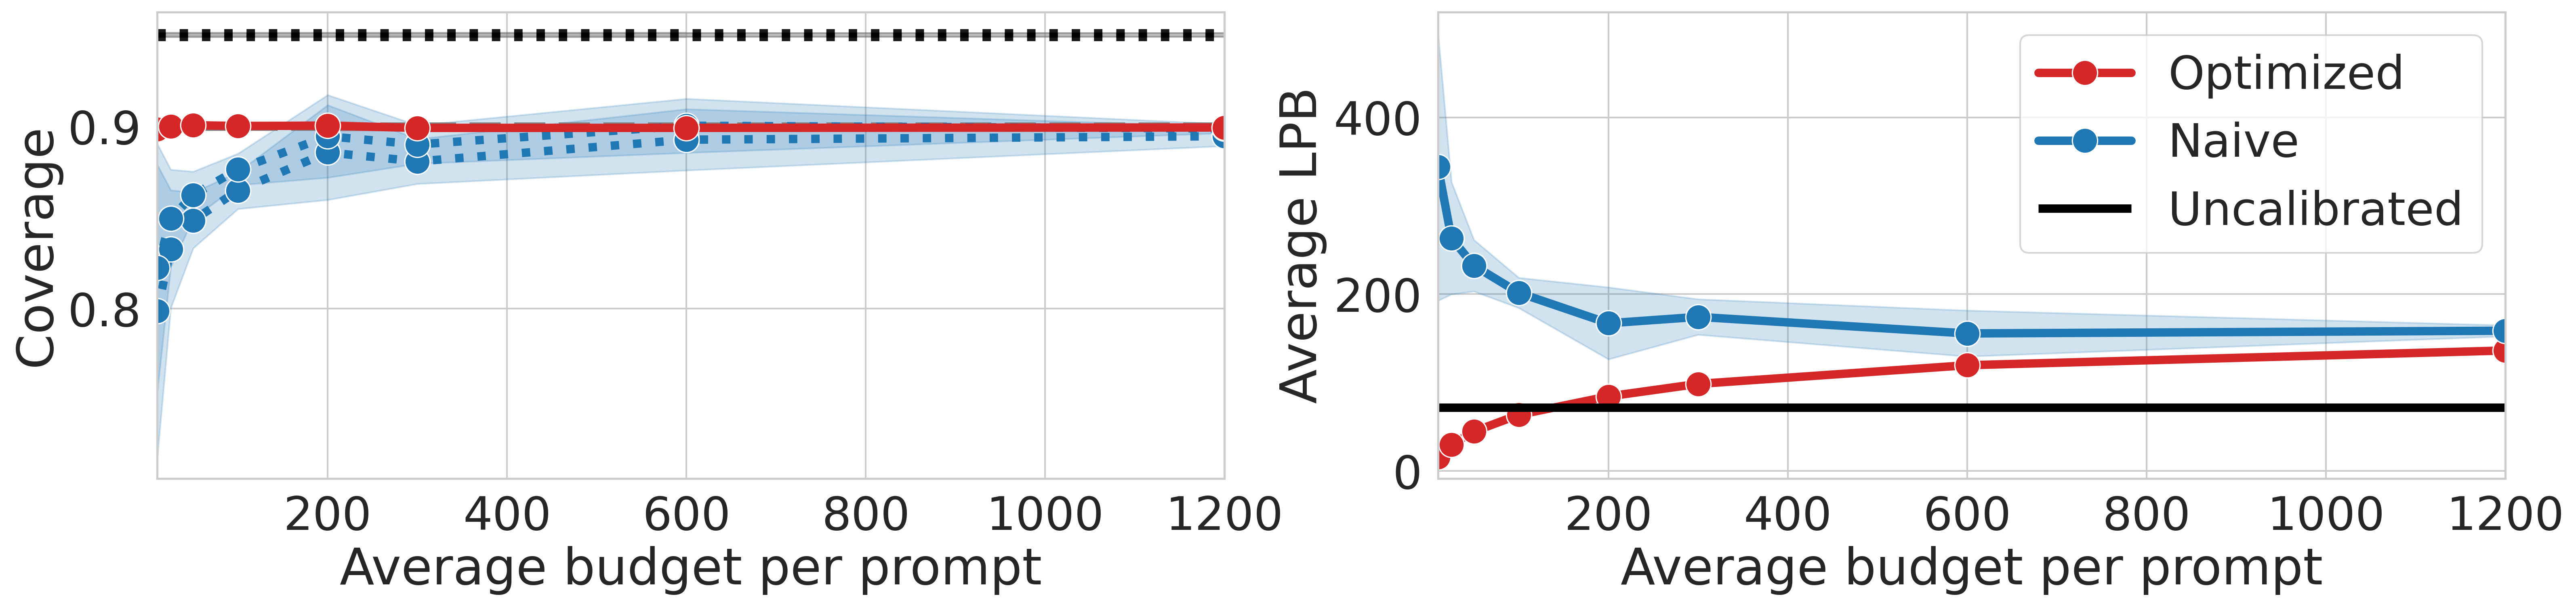

In [15]:
from matplotlib.pyplot import xlabel

import seaborn as sns

colors = sns.color_palette("tab10", 5)

sns.set(
    style="whitegrid", font_scale=2.5,
    rc={
      "lines.linewidth": 5,    # default line width
      "lines.markersize": 15   # default marker size
    }
)

results['test_coverage'] = results['test_miscoverage'].apply(lambda x: 1 - x)
results['test_coverage_lowerbound'] = results['test_miscoverage_lowerbound'].apply(lambda x: 1 - x)
results['test_coverage_upperbound'] = results['test_miscoverage_upperbound'].apply(lambda x: 1 - x)

# Change exp_name to be Fixed and Optimized
results['exp_name'] = results['exp_name'].replace({'Fixed Budgeting': 'Naive', 'Global Budgeting': 'Optimized'})

plt.figure(figsize=(25, 5))

# Coverage plot.
plt.subplot(1, 2, 1)
plt.xlabel('Average budget per prompt')
plt.ylabel("Coverage")
# Plot the ideal coverage line
sns.lineplot(data=results, x='exp_budget', y=0.9, color='gray', linestyle='--', label='Ideal Coverage')
uncalib_cov_upper = 1 - results_uncalib['test_miscoverage_lowerbound'].mean()
uncalib_cov_lower = 1 - results_uncalib['test_miscoverage_upperbound'].mean()
# Create a confidence interval between the two lines
# Add the uncalibrated line
sns.lineplot(data=results, x='exp_budget', y=uncalib_cov_upper, color='black', alpha=0.9, linestyle=':')
# Add the uncalibrated confidence interval
sns.lineplot(data=results, x='exp_budget', y=uncalib_cov_lower, color='black', alpha=0.9, linestyle=':')
# Fill the area between the two lines
plt.fill_between(results['exp_budget'], uncalib_cov_upper, uncalib_cov_lower, color='gray', alpha=0.5)

# Now plot the Fixed method
sns.lineplot(data=results, x='exp_budget', y='test_coverage_upperbound', marker="o", errorbar="sd", color=colors[0], label='Fixed', linestyle=':')
sns.lineplot(data=results, x='exp_budget', y='test_coverage_lowerbound', marker="o", errorbar="sd", color=colors[0], label='Fixed', linestyle=':')
# plt.fill_between(results['exp_budget'], results['test_coverage_lowerbound'], results['test_coverage_upperbound'], color='blue', alpha=0.5)
plt.xlim(results['exp_budget'].min(), results['exp_budget'].max())
sns.lineplot(data=results, x='exp_budget', y='test_coverage', marker="o", errorbar="sd", color=colors[3])
plt.legend().remove()

# 7. exp_budget vs test_mean_lpb
plt.subplot(1, 2, 2)
plt.xlabel('Average budget per prompt')
plt.ylabel("Average LPB")
palette = {"Naive": colors[0], "Optimized": colors[3]}
sns.lineplot(data=results, x='exp_budget', y='test_mean_lpb', marker="o", errorbar="sd", hue='exp_name', palette=palette)
# Change legend names
plt.hlines(y=results_uncalib['test_mean_lpb'].mean(), xmin=results['exp_budget'].min(), xmax=results['exp_budget'].max(), color='black', label='Uncalibrated')
plt.xlim(results['exp_budget'].min(), results['exp_budget'].max())
plt.legend()

plt.gcf().set_dpi(300)